<a href="https://colab.research.google.com/github/smhall97/deep_dreaming_music/blob/main/plot_training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import glob
import numpy as np
import pickle
import matplotlib.pyplot as plt

In [ ]:
# @title Mount Google Drive

from google.colab import drive

drive.mount('/content/drive') #it will ask you for a verification code

Mounted at /content/drive


In [ ]:
def load_data(file):
    print('loading file: ' + file)
    with open(file, 'rb') as f:
        data = pickle.load(f)

    return(data)

def get_label(m, t, augment):

  if t == 'stft_r':
    params = '{}_{}'.format(str(n_fft), str(hop_length))

  elif t == 'stft_c':
    params = '{}_{}'.format(str(n_fft), str(hop_length))

  elif t == 'mel':
    params = '{}_{}_{}'.format(str(n_fft), str(hop_length), n_mels)

  else:
    print('ERROR: Unkown transform: ', t)

  if augment:
    label = '{}AUG_{}_{}'.format(m, t, params)
  else:
    label = '{}_{}_{}'.format(m, t, params)

  return label

In [ ]:
models_list = ['vgg16', 'inception3']
transforms_list = ['stft_c', 'stft_r', 'mel']
augment_alt = [False, True]

path = '/content/drive/MyDrive/HallucinatingGANs/Code/data/models/finetuned/'

#audio transforms parrameters
n_fft = 1024
n_mels = 128
hop_length = 256 # smaller hop size leads to better reconstruction but takes longer to compute
power = 2.0 # squared power spectrogram
samplerate =  22050

#model training parameters
epochs = 40
n_workers = 1
minibatch_size = 10
finetune = True



In [ ]:
n_models = len(models_list)
n_transf = len(transforms_list)
n_augs = len(augment_alt)

val_acc = np.full((n_models, n_transf, n_augs, epochs), np.nan)
train_acc = np.full((n_models, n_transf, n_augs, epochs), np.nan)

for m in range(n_models):
  for t in range(n_transf):
    for a in range(n_augs):

      label = get_label(models_list[m], transforms_list[t], augment_alt[a])
      filename = path + label + '.pkl'

      data = load_data(filename)

      val_acc[m, t, a] = data['val_acc']
      train_acc[m, t, a] = data['train_acc']




loading file: /content/drive/MyDrive/HallucinatingGANs/Code/data/models/finetuned/vgg16_stft_c_1024_256.pkl
loading file: /content/drive/MyDrive/HallucinatingGANs/Code/data/models/finetuned/vgg16AUG_stft_c_1024_256.pkl
loading file: /content/drive/MyDrive/HallucinatingGANs/Code/data/models/finetuned/vgg16_stft_r_1024_256.pkl
loading file: /content/drive/MyDrive/HallucinatingGANs/Code/data/models/finetuned/vgg16AUG_stft_r_1024_256.pkl
loading file: /content/drive/MyDrive/HallucinatingGANs/Code/data/models/finetuned/vgg16_mel_1024_256_128.pkl
loading file: /content/drive/MyDrive/HallucinatingGANs/Code/data/models/finetuned/vgg16AUG_mel_1024_256_128.pkl
loading file: /content/drive/MyDrive/HallucinatingGANs/Code/data/models/finetuned/inception3_stft_c_1024_256.pkl
loading file: /content/drive/MyDrive/HallucinatingGANs/Code/data/models/finetuned/inception3AUG_stft_c_1024_256.pkl
loading file: /content/drive/MyDrive/HallucinatingGANs/Code/data/models/finetuned/inception3_stft_r_1024_256.pkl

In [ ]:
label

'inception3AUG_mel_1024_256_128'

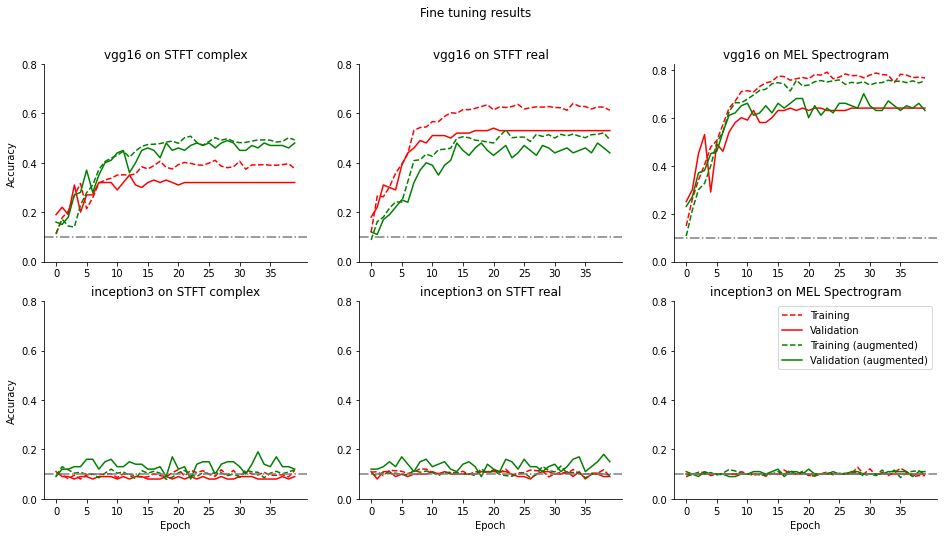

In [ ]:
ashape = val_acc.shape

plt.rc("axes.spines", top=False, right=False)

transforms_list_long = ['STFT complex', 'STFT real', 'MEL Spectrogram']

nrow = ashape[0]
ncol = ashape[1]

epochs_r = list(range(epochs))
prob = np.arange(0,1,.1)

fig, axes = plt.subplots(nrow, ncol)
fig.set_figheight(8)
fig.set_figwidth(16)

for row in range(nrow):
  for col in range(ncol):
    axes[row,col].plot(epochs_r, train_acc[row, col, 0], label='Training', linestyle="--", c='r')
    axes[row,col].plot(epochs_r, val_acc[row, col, 0], label='Validation', c='r')
    axes[row,col].plot(epochs_r, train_acc[row, col, 1], label='Training (augmented)', linestyle="--", c='g')
    axes[row,col].plot(epochs_r, val_acc[row, col, 1], label='Validation (augmented)', c='g')

    label = '{} on {}'.format(models_list[row], transforms_list_long[col])
    axes[row,col].set_yticks(prob[::2])
    axes[row,col].set_xticks(epochs_r[::5])
    axes[row,col].axhline(.1,c='tab:gray',linestyle='-.')
    axes[row,col].set_title(label)

plt.setp(axes[-1,:], xlabel="Epoch")
plt.setp(axes[:,0], ylabel="Accuracy")
fig.suptitle("Fine tuning results")
plt.legend()

plt.savefig(path + 'training_results.png')